In [1]:
#Maria Seneca

#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import seaborn as sns

# Census API Key
from config import api_key

c = Census(api_key, year=2016)

In [2]:
zipcodes_df = pd.read_csv("Input/chicago.csv")

zipcodes_df.head()

,Region,Zipcode
0,Archer Heights,60632
1,Montclare,60634
2,Edison Park,60631
3,West Lawn,60629
4,North Park,60625


In [3]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E","B17001_002E",
                            "B23025_004E","B23025_002E","B23025_005E"),{'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)

census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_004E": "employment_employed",
                                      "B23025_002E": "Labor_force",
                                      "B23025_005E": "employment_unemployed",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Employment Rate"] = 100 * \
    census_pd["employment_employed"].astype(
        int) / census_pd["Labor_force"].astype(int)
    
# Add in Poverty Rate (Poverty Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["employment_unemployed"].astype(
        int) / census_pd["Labor_force"].astype(int)
    
#Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate","employment_employed","Labor_force","employment_unemployed",
                      "Employment Rate", "Unemployment Rate"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,employment_employed,Labor_force,employment_unemployed,Employment Rate,Unemployment Rate
0,01001,17423.0,45.0,56714.0,30430.0,1462.0,8.391207,8715.0,9211.0,479.0,94.615134,5.200304
1,01002,29970.0,23.2,48923.0,26072.0,8351.0,27.864531,15180.0,16451.0,1271.0,92.274026,7.725974
2,01003,11296.0,19.9,2499.0,3829.0,54.0,0.478045,4258.0,5279.0,1021.0,80.659216,19.340784
3,01005,5228.0,44.1,70568.0,32169.0,230.0,4.399388,2835.0,2988.0,153.0,94.879518,5.120482
4,01007,14888.0,42.5,80502.0,36359.0,1410.0,9.470715,8050.0,8593.0,543.0,93.680903,6.319097


In [4]:
census_data_2 = c.acs5.get(("NAME", "B01002_002E", "B01002_003E", "B15003_017E","B01001_002E",
                            "B01001_026E"),{'for': 'zip code tabulation area:*'})

census_pd_2 = pd.DataFrame(census_data_2)

census_pd_2 = census_pd_2.rename(columns={"B01002_002E": "Median_male_age",
                                      "B01002_003E": "Median_female_age",
                                      "B15003_017E": "High_school_diploma",
                                      "B01001_002E": "Male_population",
                                      "B01001_026E": "Female_population",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

#Final DataFrame
census_pd_2 = census_pd_2[["Zipcode", "Median_male_age", "Median_female_age","High_school_diploma", 
                           "Male_population", "Female_population"]]

# Visualize
print(len(census_pd_2))
census_pd_2.head()

33120


,Zipcode,Median_male_age,Median_female_age,High_school_diploma,Male_population,Female_population
0,01001,41.6,48.1,3624.0,8059.0,9364.0
1,01002,23.3,23.2,1540.0,14536.0,15434.0
2,01003,19.9,19.9,0.0,5694.0,5602.0
3,01005,41.6,47.4,1292.0,2798.0,2430.0
4,01007,40.2,43.8,1946.0,7224.0,7664.0


In [5]:
census_data_3 = c.acs5.get(("NAME", "B14002_001E", "B16003_002E", "B16003_008E","B19083_001E"),{'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd_3 = pd.DataFrame(census_data_3)

# Column Reordering
census_pd_3 = census_pd_3.rename(columns={"B14002_001E": "Students_population",
                                       "B16003_002E": "Population_from_5_17",
                                       "B16003_008E": "Population_18_over",
                                       "B19083_001E": "Gini_index",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})
    
#Final DataFrame
census_pd_3 = census_pd_3[["Zipcode", "Students_population", "Population_from_5_17", "Population_18_over","Gini_index"]]
                        
# Visualize
print(len(census_pd_3))
census_pd_3.head()

33120


,Zipcode,Students_population,Population_from_5_17,Population_18_over,Gini_index
0,01001,17029.0,14.0,153.0,0.4052
1,01002,29476.0,71.0,564.0,0.5258
2,01003,11296.0,0.0,0.0,0.5861
3,01005,5156.0,0.0,0.0,0.4053
4,01007,14518.0,9.0,263.0,0.4300


In [6]:
# Merge two dataframes using an inner join
merge_table_1 = pd.merge(census_pd, census_pd_2, on="Zipcode")
merge_table_1.head()
print(len(merge_table_1))

33120


In [7]:
# Merge two dataframes using an inner join
merge_table_total = pd.merge(merge_table_1, census_pd_3, on="Zipcode")
merge_table_total.head()
#print(len(merge_table_total))

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,employment_employed,Labor_force,employment_unemployed,...,Unemployment Rate,Median_male_age,Median_female_age,High_school_diploma,Male_population,Female_population,Students_population,Population_from_5_17,Population_18_over,Gini_index
0,01001,17423.0,45.0,56714.0,30430.0,1462.0,8.391207,8715.0,9211.0,479.0,...,5.200304,41.6,48.1,3624.0,8059.0,9364.0,17029.0,14.0,153.0,0.4052
1,01002,29970.0,23.2,48923.0,26072.0,8351.0,27.864531,15180.0,16451.0,1271.0,...,7.725974,23.3,23.2,1540.0,14536.0,15434.0,29476.0,71.0,564.0,0.5258
2,01003,11296.0,19.9,2499.0,3829.0,54.0,0.478045,4258.0,5279.0,1021.0,...,19.340784,19.9,19.9,0.0,5694.0,5602.0,11296.0,0.0,0.0,0.5861
3,01005,5228.0,44.1,70568.0,32169.0,230.0,4.399388,2835.0,2988.0,153.0,...,5.120482,41.6,47.4,1292.0,2798.0,2430.0,5156.0,0.0,0.0,0.4053
4,01007,14888.0,42.5,80502.0,36359.0,1410.0,9.470715,8050.0,8593.0,543.0,...,6.319097,40.2,43.8,1946.0,7224.0,7664.0,14518.0,9.0,263.0,0.4300


In [8]:
#Get only Zipcodes from Chicago regions
import numpy as np
merge_table_total['Zipcode']=merge_table_total['Zipcode'].astype(np.int64)

chicago_census_df = pd.merge(merge_table_total, zipcodes_df, on="Zipcode")
chicago_census_df.to_csv("chicago_census.csv", encoding="utf-8", index=False, header=True)

In [9]:
chicago_census_df.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Count', 'Poverty Rate',
       'employment_employed', 'Labor_force', 'employment_unemployed',
       'Employment Rate', 'Unemployment Rate', 'Median_male_age',
       'Median_female_age', 'High_school_diploma', 'Male_population',
       'Female_population', 'Students_population', 'Population_from_5_17',
       'Population_18_over', 'Gini_index', 'Region'],
      dtype='object')

In [10]:
# Dropping results with population=0
population_greater_0 = chicago_census_df["Population"]>0
chicago_census_df= chicago_census_df[population_greater_0]

In [11]:
#Group by City, aggregation average by Gini index
gini_index_value = chicago_census_df["Gini_index"]>-666666666
gini_index_df = chicago_census_df[gini_index_value]

gini_index_df = gini_index_df.groupby(["Region"])['Gini_index'].agg(['mean']).sort_index().reset_index()
gini_index_df= gini_index_df.rename(columns={"mean":"Gini_index_avg"})

gini_index_df=gini_index_df.sort_values(by='Gini_index_avg', ascending=False)
gini_index_df

,Region,Gini_index_avg
6,South Shore,0.5515
9,West Town,0.5316
5,Roseland,0.4909
7,West Englewood,0.4852
4,North Park,0.4710
1,Auburn Gresham,0.4672
2,Edison Park,0.4352
8,West Lawn,0.4267
3,Montclare,0.4172
0,Archer Heights,0.4150


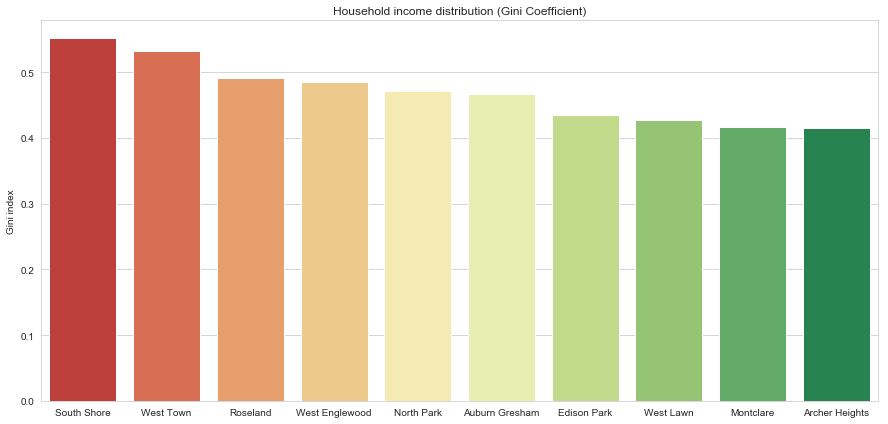

<Figure size 432x288 with 0 Axes>

In [12]:
#Plot with seaborn, make additional changes with matplotlib
#Palette color reflects values from negative to positive for better understand

sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.barplot(x="Region", y="Gini_index_avg", data=gini_index_df, palette=sns.color_palette("RdYlGn", 10))

plt.xlabel("")
plt.ylabel("Gini index")
plt.title("Household income distribution (Gini Coefficient)")

plt.show()

# Save the figure
plt.savefig("Output/Gini_index_by_region.png")


In [13]:
##Clean and preparing data
unemployment_value = chicago_census_df["Unemployment Rate"]>-666666666
poverty_value = chicago_census_df["Poverty Rate"]>-666666666

poverty_unemployment_df = chicago_census_df[unemployment_value & poverty_value]

poverty_unemployment_df = poverty_unemployment_df.groupby(["Region"])[['Unemployment Rate','Poverty Rate']].agg(['mean']).sort_index().reset_index()

poverty_unemployment_df.columns = poverty_unemployment_df.columns.droplevel(1)

poverty_unemployment_df= poverty_unemployment_df.rename(columns={"Unemployment Rate":"Unemployment_Rate","Poverty Rate":"Poverty_Rate"})

poverty_unemployment_df

,Region,Unemployment_Rate,Poverty_Rate
0,Archer Heights,11.802452,22.469128
1,Auburn Gresham,22.253788,26.997504
2,Edison Park,4.607631,4.532899
3,Montclare,6.757605,11.442861
4,North Park,7.173580,16.550653
5,Roseland,26.029773,31.108891
6,South Shore,19.678065,33.771949
7,West Englewood,32.350236,35.339165
8,West Lawn,17.364991,22.372811
9,West Town,15.620609,33.111167


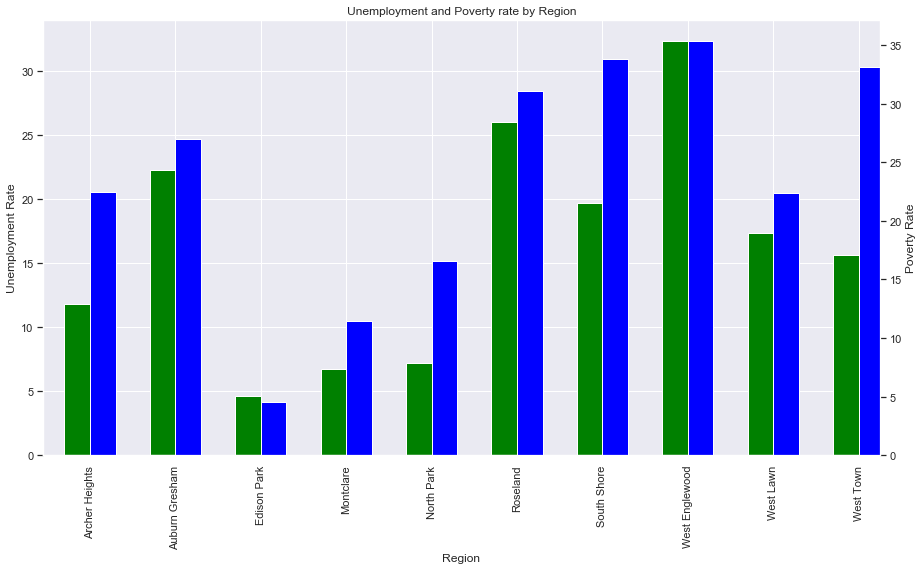

In [14]:
#Plot unemployment rate and poverty rate in two columns to compare results

sns.set()
poverty_unemployment_df = poverty_unemployment_df.set_index('Region')

fig = plt.figure(figsize=(15,8)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as a
width = .3

poverty_unemployment_df.Poverty_Rate.plot(kind='bar',color='blue', ax=ax2,width = width,position=0)

poverty_unemployment_df.Unemployment_Rate.plot(kind='bar',color='green',ax=ax,width=width, position=1)
ax.grid(None, axis=1)
ax2.grid(None)

ax.set_ylabel('Unemployment Rate')
ax2.set_ylabel('Poverty Rate')
plt.title("Unemployment and Poverty rate by Region")
# Save the figure
plt.savefig("Output/Unemployment_rate_by_region.png")

In [15]:
##Clean and preparing data
median_age_value = chicago_census_df["Median Age"]>-666666666
median_male_age_value = chicago_census_df["Median_male_age"]>-666666666
median_female_age_value = chicago_census_df["Median_female_age"]>-666666666


age_stats_df = chicago_census_df[median_age_value & median_male_age_value & median_female_age_value]
age_stats_df = age_stats_df.groupby(["Region"])[['Median Age','Median_male_age','Median_female_age']].agg(['mean']).sort_index().reset_index()
age_stats_df.columns = age_stats_df.columns.droplevel(1)
age_stats_df = age_stats_df.rename(columns={"Median Age":"Median_age"})

age_stats_df.head()

,Region,Median_age,Median_male_age,Median_female_age
0,Archer Heights,30.6,30.3,30.9
1,Auburn Gresham,39.6,35.1,42.5
2,Edison Park,43.3,42.7,43.8
3,Montclare,38.6,38.2,39.1
4,North Park,34.0,33.8,34.3


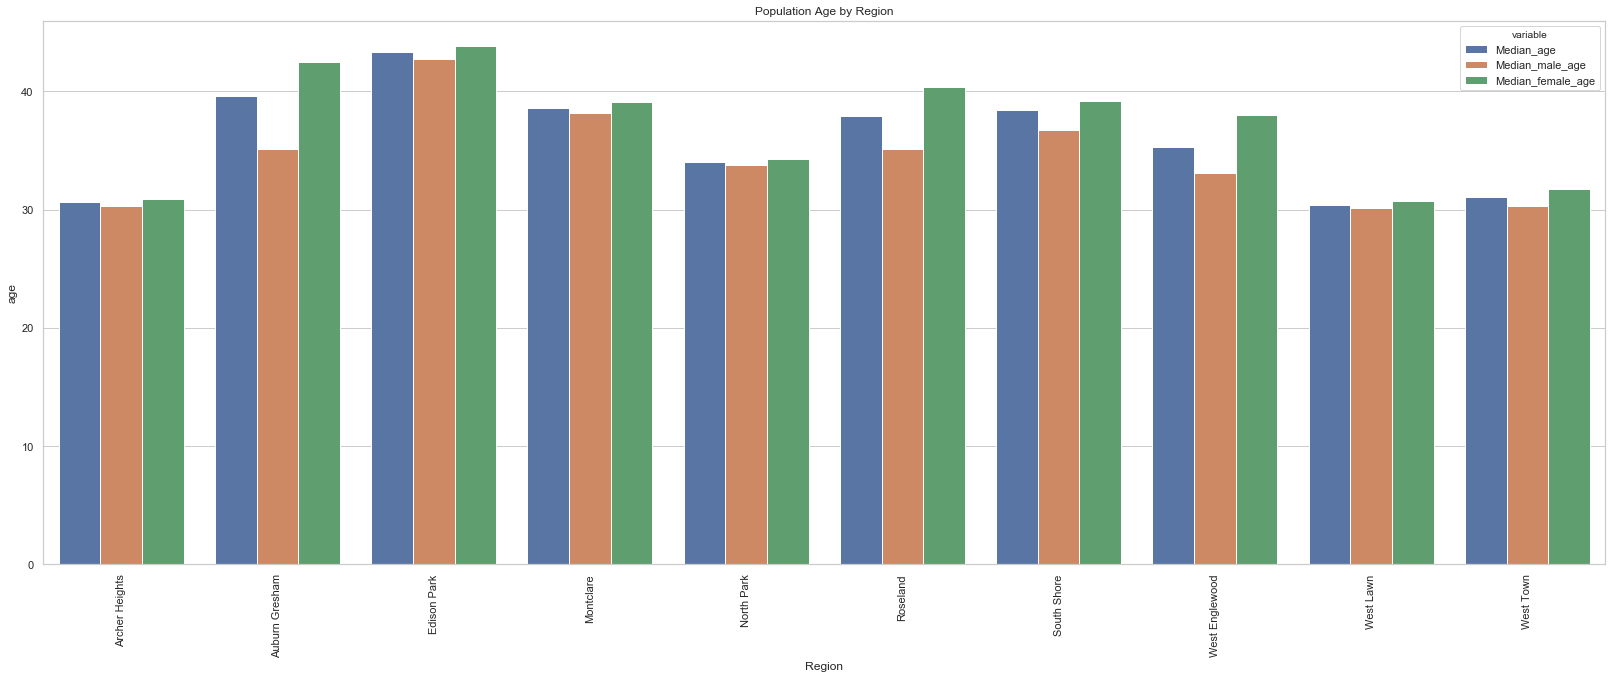

<Figure size 432x288 with 0 Axes>

In [16]:
##Unpivot data for Seaborn plots
sns.set_style("whitegrid")
age_stats_df_plot=age_stats_df[['Region','Median_age','Median_male_age','Median_female_age']]

age_stats_df_upivot=pd.melt(age_stats_df_plot, id_vars=['Region'], value_vars=['Median_age', 'Median_male_age','Median_female_age'])

cities=age_stats_df[['Region']]

plt.figure(figsize=(28,10))
sns.barplot(x='Region', y='value', hue='variable', data=age_stats_df_upivot)
plt.xticks(rotation=90)

plt.ylabel('age')
plt.title('Population Age by Region')
plt.show()
plt.savefig("Output/age_by_region.png")

In [17]:
##Clean and preparing data
High_school_diploma_value = chicago_census_df["High_school_diploma"]>-666666666

education_df = chicago_census_df[High_school_diploma_value]

education_df = education_df.groupby(["Region"])[['High_school_diploma','Population']].agg(['sum']).sort_index().reset_index()
education_df.columns = education_df.columns.droplevel(1)

# Add in Education none Rate (Education none Count / Population)
education_df["High_school_diploma_Rate"] = 100 * \
    education_df["High_school_diploma"].astype(
        int) / education_df["Population"].astype(int)
    
education_df=education_df.sort_values(by='High_school_diploma_Rate', ascending=False)
education_df



,Region,High_school_diploma,Population,High_school_diploma_Rate
7,West Englewood,8303.0,35779.0,23.206350
3,Montclare,14614.0,73382.0,19.914966
1,Auburn Gresham,13243.0,69299.0,19.109944
8,West Lawn,21028.0,115104.0,18.268696
0,Archer Heights,15719.0,91668.0,17.147751
2,Edison Park,4778.0,28238.0,16.920462
5,Roseland,10490.0,68077.0,15.409022
6,South Shore,5831.0,45218.0,12.895307
9,West Town,4452.0,35559.0,12.520037
4,North Park,8259.0,79157.0,10.433695


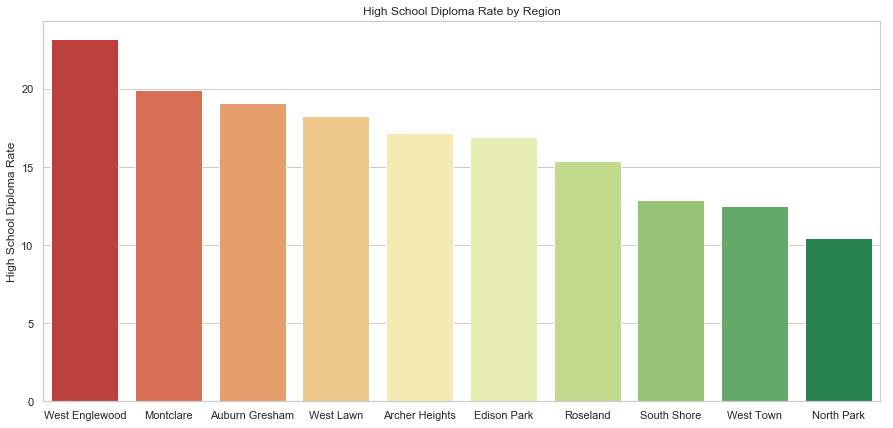

In [18]:
#Graph Education
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.barplot(x="Region", y="High_school_diploma_Rate", data=education_df, palette=sns.color_palette("RdYlGn", 10))

plt.xlabel("")
plt.ylabel("High School Diploma Rate")
plt.title("High School Diploma Rate by Region")
plt.savefig("Output/diploma_by_region.png")